In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import pandas as pd
import scipy.sparse
import random
import tensorflow as tf

In [ ]:
''' load dataset from sklearn '''
from sklearn.datasets import fetch_rcv1
rcv1 = fetch_rcv1(shuffle=True)# change arrangment of sample randomly 

In [ ]:
N_SAMPLES = 12000 
from sklearn.utils import resample
X1, y1 = resample(rcv1.data, rcv1.target, replace=False,
                n_samples=N_SAMPLES, random_state=1234)
X1 = X1.toarray()
y1 = y1.toarray()

In [ ]:
!pip3 install susi

# **SUSI SOM**

In [ ]:
import susi

# initialize and fit SOM
som = susi.SOMClustering(n_rows=25,n_columns=25,n_iter_unsupervised =1000,learning_rate_start=0.7)
                         
som.fit(X1)

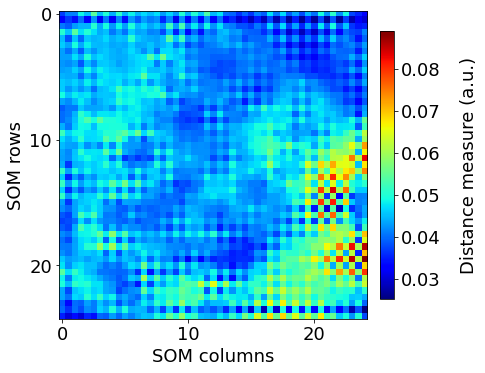

In [ ]:
from susi.SOMPlots import plot_estimation_map,plot_nbh_dist_weight_matrix,plot_som_histogram,plot_umatrix
u_matrix = som.get_u_matrix()
plot_umatrix(u_matrix, 25, 25, cmap="jet")
plt.show()

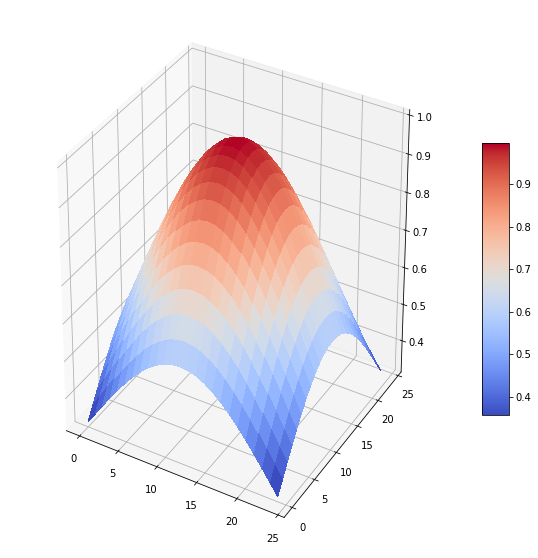

In [ ]:
plot_nbh_dist_weight_matrix(som)
plt.show()

In [ ]:
clusters = som.get_clusters(X1)

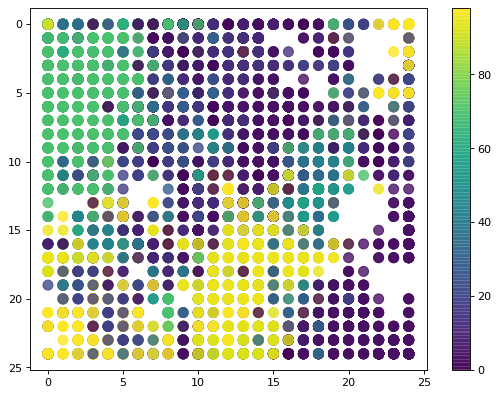

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(x=[c[1] for c in clusters_pickle], y=[c[0] for c in clusters_pickle], c=np.argmax(y1, axis=1), alpha=0.8,s=80)
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

In [3]:
import pickle

with open('/content/y25.pickle', 'rb') as f1:
    y1 = pickle.load(f1)

with open('/content/clusters25.pickle', 'rb') as f2:
    clusters_pickle = pickle.load(f2)

proj_map = np.array(clusters_pickle)

In [3]:
map_tensor = np.zeros(shape = (25,25,y1.shape[1]))
for i in range(25):
  for j in range(25):
    location = np.where((proj_map[:,0]==i) & (proj_map[:,1]==j) )

    for k in location[0]:
      for n in range(y1.shape[1]):
        map_tensor[i,j,n]+=y1[k,n]


In [ ]:
aggregated_max = 0
aggregated_sum = 0
for i in range(25):
  for j in range(25):
    aggregated_max += np.max(map_tensor[i,j,:])
    aggregated_sum += np.sum(map_tensor[i,j,:])
print("Purity is:",aggregated_max/y1.shape[0]*100.0)

Purity is: 88.81666666666666


### **Purity based on all labels aproach is: 88.817%**

In [4]:
map_tensor = np.zeros(shape = (25,25,y1.shape[1]))
for i in range(25):
  for j in range(25):
    location = np.where((proj_map[:,0]==i) & (proj_map[:,1]==j) )
    for k in location[0]:
      map_tensor[i,j,np.argmax(y1[k])]+=1

In [5]:
aggregated_max = 0
aggregated_sum = 0
for i in range(25):
  for j in range(25):
    aggregated_max += np.max(map_tensor[i,j,:])
    aggregated_sum += np.sum(map_tensor[i,j,:])
print("Purity is:",aggregated_max/y1.shape[0]*100.0)

Purity is: 62.74999999999999


### **Purity based on first label is: 62.75%**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


<StemContainer object of 3 artists>

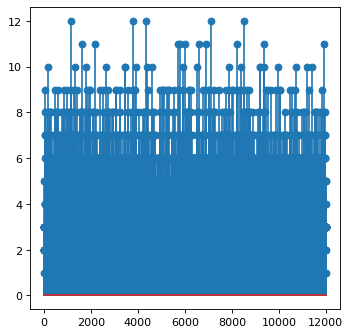

In [ ]:
plt.figure(figsize=(5,5),dpi=80)
aggregate_list =[]
for i in range(y1.shape[0]):
  wed = np.where(y1[i]==1)
  aggregate_list.append(len(wed[0]))
  #print(len(wed[0]))
plt.stem(aggregate_list)

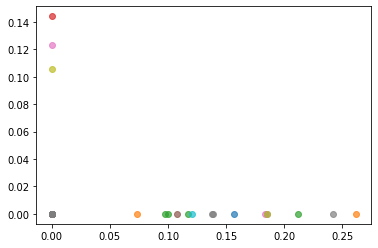

In [ ]:
proj_map
cluster_index = np.ravel_multi_index(proj_map.T, (25,25))
for c in np.unique(cluster_index):
    plt.scatter(X1[cluster_index == c, 10],
                X1[cluster_index == c, 20],
                label='cluster='+str(c), alpha=.7)
